In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(25,7)})

**Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.**

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [3]:
df_games = pd.read_csv('games.csv')

In [4]:
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df_games.shape

(16598, 11)

In [6]:
df_games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
df_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df_games.isna().sum() # пропущенные значения

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df_games = df_games.dropna() # сброс пропущенных значений

In [10]:
df_games.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.**

In [11]:
df_games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [12]:
stats.mode(df_games.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

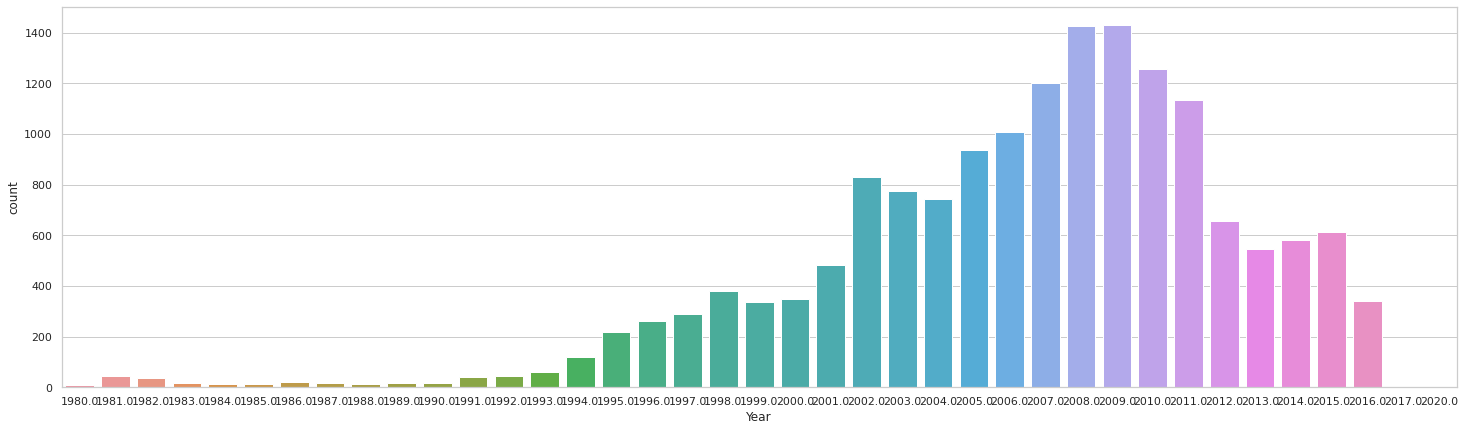

In [13]:
sns.countplot(data = df_games, x = df_games.Year)

In [13]:
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**На каких платформах произошло больше всего релизов?**

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. 

In [14]:
df_game_releases_by_platform = df_games.Platform\
    .value_counts(normalize=True).mul(100)\
    .reset_index()\
    .query('Platform > 7')

In [15]:
df_game_releases_by_platform

,index,Platform
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735
5,PSP,7.347615
6,PS,7.298508


**Игры каких издателей (Publisher) встречаются в датасете чаще всего?**

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [16]:
df_games_by_publisher = df_games.Publisher\
    .value_counts()

In [17]:
df_games_by_publisher.head(1)

Electronic Arts    1339
Name: Publisher, dtype: int64

In [18]:
#OR

In [19]:
stats.mode(df_games.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

**Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other).**

В каком регионе медианное значение объема продаж является наибольшим?

In [20]:
df_nintendo_games_stat = df_games[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]\
    .query('Publisher == "Nintendo"')\
    .agg(['mean', 'median', 'std'])\

In [21]:
df_nintendo_games_stat

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170


**Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:**

- по оси x будет расположен **жанр игры (Genre)**
- по оси у – объем продаж в **Японии (JP_sales)**

Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

In [22]:
df_nintendo_games_stat = df_games[['Publisher', 'JP_Sales', 'Genre']]\
    .query('Publisher == "Nintendo"')\

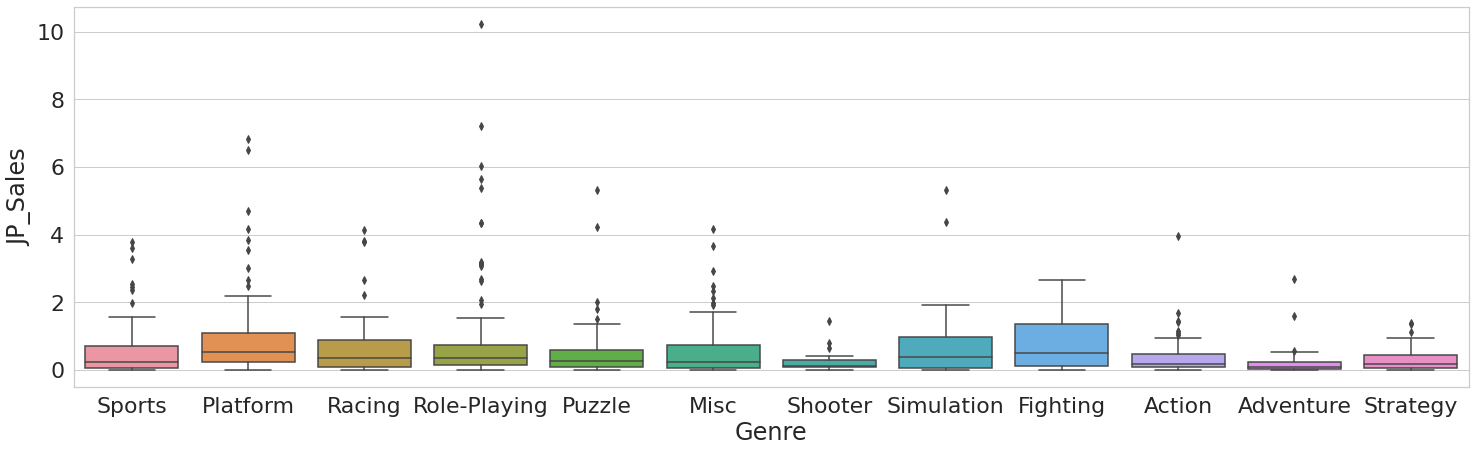

In [23]:
sns.boxplot(data = df_nintendo_games_stat, x = df_nintendo_games_stat.Genre, y = df_nintendo_games_stat.JP_Sales)

In [24]:
# Наибольший межквартильный размах наблюдается у игр жанра Fighting. 
# Межквартильный размах у Strategy меньше, чем у Puzzle. 
# Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation.

**Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.**

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.

In [26]:
genre_list =['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']

In [29]:
df_nintendo_games_stat = df_games[['Publisher', 'Year', 'Global_Sales', 'Genre']]\
    .query('Publisher == "Nintendo" and Genre == @genre_list')\

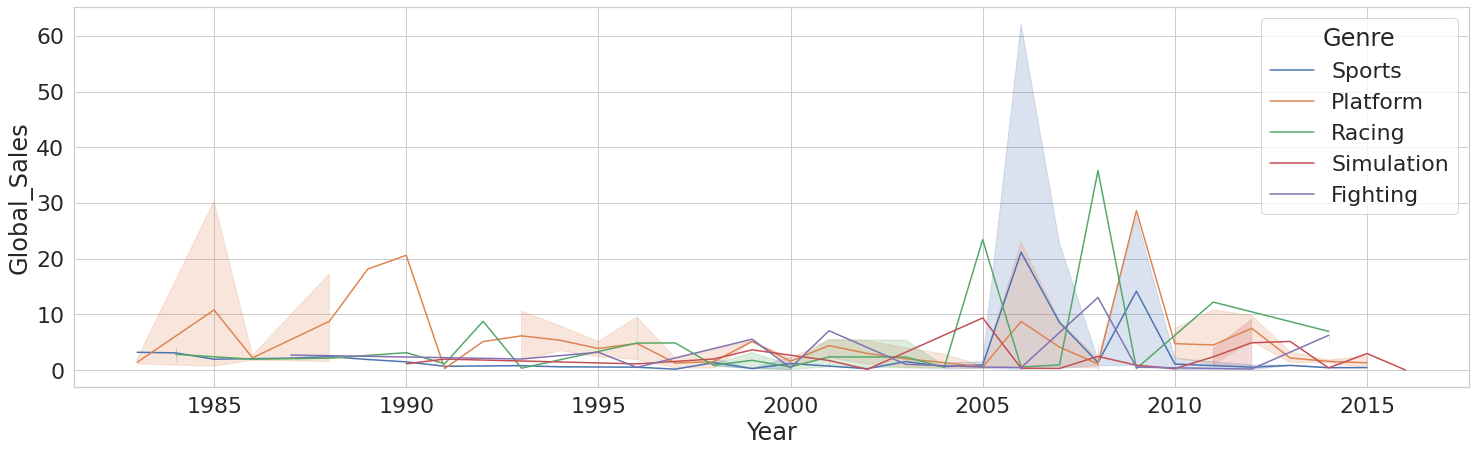

In [33]:
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = df_nintendo_games_stat)

In [32]:
# 2005 – 2010